In [9]:
#%pip install pandas
#%pip install matplotlib

In [10]:
import pandas as pd
import math as m
import random
import matplotlib.pyplot as plt

In [11]:
datacsv = pd.read_csv('dataset.csv')
data_set = datacsv.values.tolist()
trainingDataset = data_set[:int(len(data_set)*.70)]
validationDataset = data_set[int(len(data_set)*.70):int(len(data_set)*.85)]
testDataset = data_set[-int(len(data_set)*.15):]

In [12]:
def sigmoid(z):
    return 1 / (1 + m.exp(-z))

In [13]:

def TrainingData(trainingDataset, lr):
    theta = [random.uniform(0,1) for _ in range(len(trainingDataset[0]))]
    history = []
    itr = 0
    while itr <= 500:
        itr += 1
        TJ = 0
        for X in trainingDataset:
            z = sum([t * x for t, x in zip(theta, X[:-1] + [1])]) #  np.dot(X, theta) dot multiplication
            if z > 100:
                h = 1  
            elif z < -100:
                h = 0  
            else:
                h = sigmoid(z)
            y = X[-1]
            if h == 0:
                h = 0.0000001
            if h == 1:
                h = 0.9999999
            J = -y * m.log(h) - (1 - y) * m.log(1 - h) # J = -{y * log(h)} -{(1-y) * log(1-h)} equation for loss calculation
            TJ += J
            # Gradient Descent
            dv = [x * (h - y) for x in X[:-1] + [1]] #  (h-y) * X  scalar multiplication                                                                                  
            theta = [t - (dvi * lr) for t, dvi in zip(theta, dv)] # theta -= dv * lr      
      
        TJ /= len(trainingDataset)
        history.append(TJ)

    return theta, history

In [14]:
def Validation(data_set,theta):
    correct = 0
    for V in data_set:
        z = sum([t*v for t,v in zip(theta,V[:-1] + [1])]) #  np.dot(V, theta) dot multiplication
        if z > 100:
            h = 1  
        elif z < -100:
            h = 0  
        else:
            h = sigmoid(z)
        if h >= 0.5:
            h = 1
        else: 
            h = 0
        y = V[-1]
        if h == y:
            correct += 1
    val_acc = (correct*100)/len(data_set)
    return val_acc
        

In [15]:
LearningRate = [0.1,0.01,0.001,.0001]
max_vRate = 0
for LR in LearningRate:
    theta, train_loss = TrainingData(testDataset,LR)
    vRate = Validation(validationDataset,theta)
    print("Accuracy :",round(vRate, 2),"for",LR)
    if vRate > max_vRate :
        Rate = LR
        max_vRate = vRate
        loss = train_loss
        bestTheta = theta

Accuracy : 74.78 for 0.1
Accuracy : 70.43 for 0.01
Accuracy : 70.43 for 0.001
Accuracy : 72.17 for 0.0001


In [16]:
print("Test Accuracy :",round(Validation(testDataset,bestTheta),2),"for",Rate)

Test Accuracy : 64.35 for 0.1


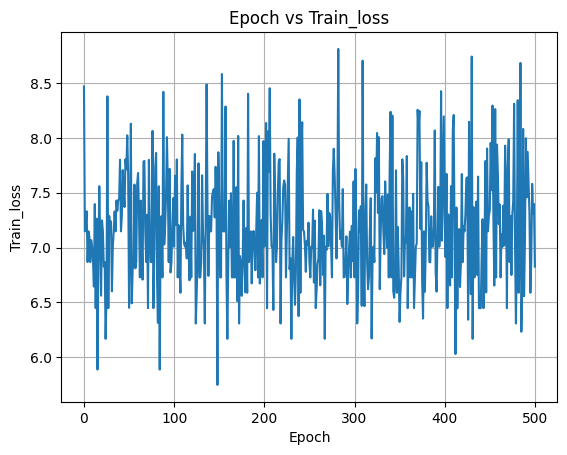

In [17]:
itr = [i for i in range(len(loss))]
plt.plot(itr,loss)
plt.xlabel('Epoch')
plt.ylabel('Train_loss')
plt.title('Epoch vs Train_loss')
plt.grid(True)
plt.show()